# Analysis of House Price Rate at Different location in Mumbai 

![](https://www.interest.co.nz/sites/default/files/feature_images/house-price-growth.jpg)

## A. EDA (Exploratory Data Analysis)

### Import Required Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Load DataSet

In [2]:
df =pd.read_csv('houseprice_mumbai.csv')

### Drop Duplicates

In [3]:
df.drop_duplicates(inplace=True)

In [4]:
df.shape

(3791, 7)

In [5]:
df.dtypes 

BHK           object
project       object
Location      object
City          object
Total sqft     int64
price_sqft    object
price         object
dtype: object

### Feature Correction 

### 1. BHK

In [6]:
df['BHK'].unique()

array(['3 BHK Apartment', '2 BHK Apartment', '1 BHK Independent House',
       '1 BHK Apartment', '1 RK Studio Apartment', '1', '4 BHK Apartment',
       'R', '3', '2', '5 BHK Independent Floor',
       '3 BHK Independent House', '3 BHK Villa', '4',
       '2 BHK Independent Floor', '1 BHK Villa', '5',
       '2 RK Studio Apartment', '6', '5 BHK Apartment',
       '2 BHK Independent House', '4 BHK Villa'], dtype=object)

In [7]:
def fun(x):
    if len(x)!=1:
        s=str(x).split(" ")[0]
        return s
    else:
        return x

In [8]:
df['BHK']=df['BHK'].map(lambda x: fun(x))

In [9]:
df['BHK'].unique()

array(['3', '2', '1', '4', 'R', '5', '6'], dtype=object)

In [10]:
#Drop all records with R BHK 
i=df[df['BHK']=='R'].index
df.drop(i,axis=0,inplace=True)

In [11]:
i=df[df['project'].isnull()].index
df.drop(i,axis=0,inplace=True)

In [12]:
df.shape

(2934, 7)

In [13]:
df['BHK'].unique()

array(['3', '2', '1', '4', '5'], dtype=object)

### 2. Location

In [14]:
df['Location']=df['Location'].map(lambda x: str(x).strip())

In [15]:
df['Location'].unique()

array(['Chembur', 'Kurla', 'Malad West', 'Rasayani', 'Vikhroli', 'Neral',
       'Mahim', 'Fort', 'Dombivali', 'Palghar', 'Malad East', 'Vangani',
       'Jogeshwari West', 'Dahisar', 'Borivali East', 'Mulund West',
       'Kharghar', 'Vasai', 'Santacruz East', 'Ambernath East',
       'Andheri West', 'Mazagaon', 'Karjat', 'Khopoli', 'Goregaon East',
       'Panvel', 'Kalyan West', 'Andheri East', 'Dronagiri', 'Umroli',
       'Virar', 'Kalyan East', 'Thane West', 'Shahapur', 'Taloja', 'Ulwe',
       'Titwala', 'Diva', 'Kamothe', 'Bhiwandi', 'Kandivali West',
       'Powai', 'Badlapur West', 'Mira Road East', 'Vasai east', 'Wada',
       'Sion', 'Badlapur East', 'Santacruz West', 'Nala Sopara',
       'Borivali West', 'Nerul', 'Ghatkopar West', 'Karanjade',
       'Kanjurmarg', 'Anjurdive', 'Navade', 'Airoli', 'Goregaon West',
       'Bandra West', 'Kamathipura', 'Bhayandar West', 'Dadar East',
       'Bhayandar East', 'Sanpada', 'Jogeshwari East', 'Kalwa',
       'Koper Khairane', 'Du

In [16]:
df['Location']=df['Location'].map(lambda x: str(x).title())

### 3. City

In [17]:
df['City'].unique()

array(['Mumbai'], dtype=object)

In [18]:
df.drop('City',axis=1,inplace=True)

### 4. Total sqft

In [19]:
df['Total sqft'].unique()

array([ 984,  598,  738,  644,  582,  427, 1130,  671,  917,  701,  387,
        417,  333,  638,  425,  623,  501,  771,  938,  287, 2215,  778,
        821,  565,  395,  590,  230,  396,  755,  428,  485,  261,  477,
        655,  950,  527,  500,  409,  653,  320,  928,  410,  469,  575,
        263,  442,  715,  628,  515, 1300,  740,  445,  321,  670,  650,
       1239,  542,  585,  343,  567,  520,  522,  476,  999,  329,  739,
        592,  489,  435,  540,  699,  465,  713,  679,  887, 1045,  690,
       1085, 1060,  795,  692,  487,  440,  936,  408,  398,  632,  625,
        580,  710,  618,  770, 1232,  767,  374,  416,  438,  302,  514,
        455,  651,  568,  421,  368,  834,  841,  825,  775,  528,  511,
        507,  506,  684,  617,  447, 1150,  631,  744,  868,  687,  636,
        691,  674,  680,  862,  682,  616,  735,  990,  695,  576,  433,
        694, 1835, 1245, 1745, 1335,  424,  451,  330,  326,  513,  613,
        405,  241,  790,  605,  430,  646,  323,  5

### 5. project

In [20]:
df['project']=df['project'].map(lambda x: str(x).strip())

In [21]:
df['project'].unique()

array(['SHREE KRISHNA SangamChembur', 'Ekdanta 24 KaratKurla',
       'Liberty Bay VueMalad West', ...,
       'Mahaveer Solitaire EdgeKandivali East',
       'Reputed Builder Riddhi GardenMalad East',
       'Neelkanth AlpineGhansoli'], dtype=object)

In [22]:
df = df.reset_index()

In [23]:
df.drop('index',inplace=True,axis=1)

In [24]:
df['project']=df['project'].map(lambda x: str(x).strip())

In [25]:
for i,v in enumerate(df['Location']):
    df['project'][i]=df['project'][i].split(v)[0]

In [26]:
df

,BHK,project,Location,Total sqft,price_sqft,price
0,3,SHREE KRISHNA Sangam,Chembur,984,"31,000",3.05 Cr
1,2,Ekdanta 24 Karat,Kurla,598,"23,913",1.42 Cr
2,2,Liberty Bay Vue,Malad West,738,"21,000",1.54 Cr
3,3,Thalia Vrindavan Flora,Rasayani,644,"10,676",68.75 L
4,2,Mayfair The View,Vikhroli,582,"24,914",1.45 Cr
...,...,...,...,...,...,...
2929,3,Homewell Agarwal Floresta Oak,Goregaon East,882,"25,510",2.24 Cr
2930,1,Dynamix Parkwoods,Thane West,650,"11,076",72 L
2931,3,Reputed Builder Riddhi Garden,Malad East,1250,"16,000",2 Cr
2932,2,Neelkanth Alpine,Ghansoli,1200,"11,666",1.4 Cr


### 6. Price

In [27]:
def fun(x):
    if 'Cr' in x or 'cr' in x:
        s=str(x).split(" ")[0]
        s1=str(int(float(s)*100))
        return s1
    else:
        s=str(x).split(" ")[0]
        return s

In [28]:
df['price']=df['price'].map(lambda x: fun(x))

In [29]:
df['price']

0         305
1         142
2         154
3       68.75
4         145
        ...  
2929      224
2930       72
2931      200
2932      140
2933       65
Name: price, Length: 2934, dtype: object

In [30]:
a='28,523'
print(''.join(a.split(",")))

28523


### 7. price_sqft

In [31]:
df['price_sqft']=df['price_sqft'].map(lambda x: str(x).strip())

In [32]:
df

,BHK,project,Location,Total sqft,price_sqft,price
0,3,SHREE KRISHNA Sangam,Chembur,984,"31,000",305
1,2,Ekdanta 24 Karat,Kurla,598,"23,913",142
2,2,Liberty Bay Vue,Malad West,738,"21,000",154
3,3,Thalia Vrindavan Flora,Rasayani,644,"10,676",68.75
4,2,Mayfair The View,Vikhroli,582,"24,914",145
...,...,...,...,...,...,...
2929,3,Homewell Agarwal Floresta Oak,Goregaon East,882,"25,510",224
2930,1,Dynamix Parkwoods,Thane West,650,"11,076",72
2931,3,Reputed Builder Riddhi Garden,Malad East,1250,"16,000",200
2932,2,Neelkanth Alpine,Ghansoli,1200,"11,666",140


In [33]:
def fun(x):
    if "," in str(x):
        s=''.join(str(x).split(","))
        return s
    else:
        return x

In [34]:
df['price_sqft']=df['price_sqft'].map(lambda x: fun(x))

### Change Data Type 

In [35]:
df['BHK']=df['BHK'].astype('int')
df['Total sqft']=df['Total sqft'].astype('int')
df['price_sqft']=df['price_sqft'].astype('int')
df['price']=df['price'].astype('float')

In [36]:
df

,BHK,project,Location,Total sqft,price_sqft,price
0,3,SHREE KRISHNA Sangam,Chembur,984,31000,305.00
1,2,Ekdanta 24 Karat,Kurla,598,23913,142.00
2,2,Liberty Bay Vue,Malad West,738,21000,154.00
3,3,Thalia Vrindavan Flora,Rasayani,644,10676,68.75
4,2,Mayfair The View,Vikhroli,582,24914,145.00
...,...,...,...,...,...,...
2929,3,Homewell Agarwal Floresta Oak,Goregaon East,882,25510,224.00
2930,1,Dynamix Parkwoods,Thane West,650,11076,72.00
2931,3,Reputed Builder Riddhi Garden,Malad East,1250,16000,200.00
2932,2,Neelkanth Alpine,Ghansoli,1200,11666,140.00


### Frequency of Each Location

In [37]:
df['Location'].value_counts()

Mira Road East    438
Virar             271
Dombivali         204
Naigaon East      163
Thane West        130
                 ... 
Juhu                1
Ambarnath           1
Juna Palghar        1
Peddar Road         1
Virar West          1
Name: Location, Length: 121, dtype: int64

In [38]:
df['Location'].value_counts()[df['Location'].value_counts()>20]

Mira Road East     438
Virar              271
Dombivali          204
Naigaon East       163
Thane West         130
Malad West          83
Kharghar            78
Panvel              60
Vasai               59
Kandivali East      56
Chembur             54
Powai               50
Malad East          49
Borivali West       49
Karjat              46
Airoli              44
Ghansoli            42
Dahisar             41
Badlapur West       40
Bhandup West        39
Mulund West         38
Andheri West        37
Bhayandar East      33
Kalyan West         32
Rasayani            32
Taloja              31
Kurla               30
Kandivali West      30
Koper Khairane      29
Goregaon East       28
Palghar             27
Borivali East       27
Kanjurmarg          26
Ambernath East      23
Jogeshwari West     23
Name: Location, dtype: int64

In [39]:
dic=list(df['Location'].value_counts()[:50].to_dict().keys())
print(len(dic))

50


In [40]:
df['Location'].value_counts()[:50]

Mira Road East          438
Virar                   271
Dombivali               204
Naigaon East            163
Thane West              130
Malad West               83
Kharghar                 78
Panvel                   60
Vasai                    59
Kandivali East           56
Chembur                  54
Powai                    50
Malad East               49
Borivali West            49
Karjat                   46
Airoli                   44
Ghansoli                 42
Dahisar                  41
Badlapur West            40
Bhandup West             39
Mulund West              38
Andheri West             37
Bhayandar East           33
Kalyan West              32
Rasayani                 32
Taloja                   31
Kurla                    30
Kandivali West           30
Koper Khairane           29
Goregaon East            28
Palghar                  27
Borivali East            27
Kanjurmarg               26
Ambernath East           23
Jogeshwari West          23
Karanjade           

## B. Data Visualization

### Statistical Info

In [41]:
df.describe()

,BHK,Total sqft,price_sqft,price
count,2934.000000,2934.000000,2934.000000,2934.000000
mean,1.705862,827.795501,12689.180300,111.986895
std,0.741622,394.428649,8987.100057,123.496538
min,1.000000,127.000000,1249.000000,6.500000
25%,1.000000,585.000000,6000.000000,39.815000
50%,2.000000,725.000000,9532.500000,74.000000
75%,2.000000,1000.000000,16969.000000,137.750000
max,5.000000,4700.000000,79166.000000,1900.000000


### Total No of House Availability for sale at different location

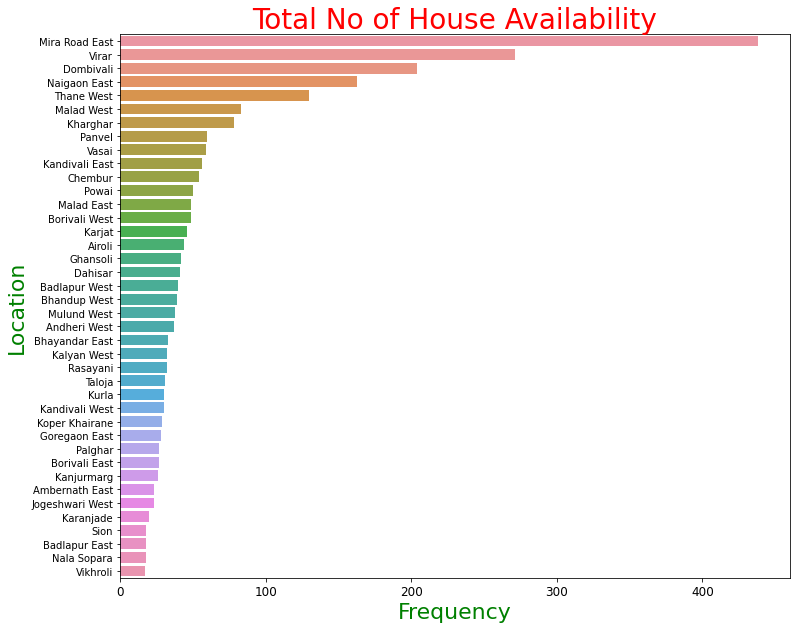

In [42]:
plt.figure(figsize=(12,10))
most_cat = df['Location'].value_counts()[:40]
sns.barplot(x=most_cat, y=most_cat.index, data=df)
plt.xticks(size=12)
plt.xlabel("Frequency",size=22,c="g")
plt.ylabel("Location",size=22,c="g")
plt.title("Total No of House Availability",size=28,c="r")
plt.show()

#### Conclusion:
* Total Availability is more in miraroad, virar, dombiwali, Niagoan and Thane side 

### Total % of BHK

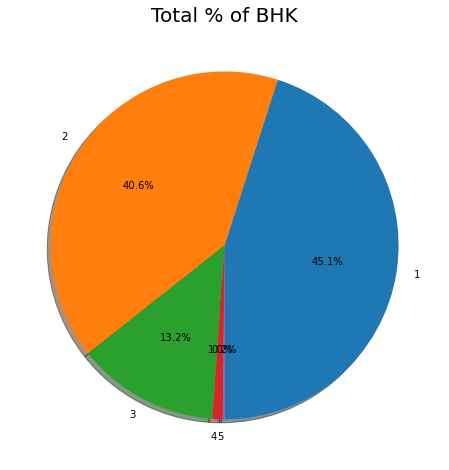

In [43]:
plt.figure(figsize=(8,8))
labels =df['BHK'].value_counts(sort = True).index
sizes = df['BHK'].value_counts(sort = True)
plt.pie(sizes, labels=labels,autopct='%1.1f%%', shadow=True, startangle=270,)
plt.title('Total % of BHK',size = 20)
plt.show()

#### Conclusion:
* 1 BHK and 2 BHK sales are very more and 
* 4 and 5 BHK is very very less i.e less than 10%

### Relation of Price vs Total sqft area of House

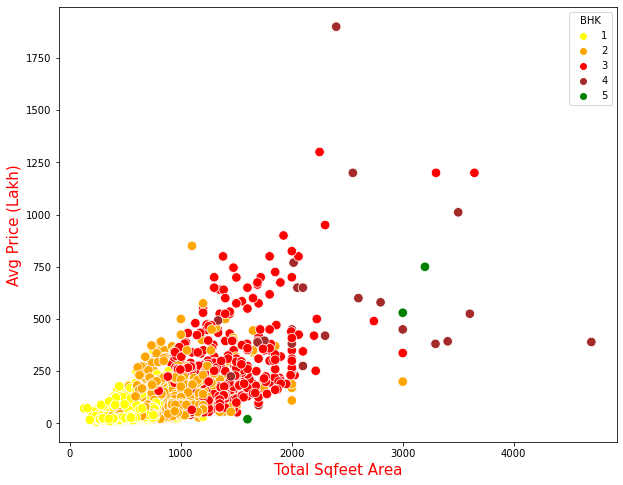

In [44]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='Total sqft',y='price',data=df,hue='BHK',s=90,palette=['yellow','orange','red','brown','green'])
plt.xlabel("Total Sqfeet Area",size=15,c="r")
plt.ylabel("Avg Price (Lakh)",size=15,c="r")
plt.show()

#### Conclusion
* Total sft area and price has strong postive correlation
* More sft area more the price of house

### Avg Price for Each Location

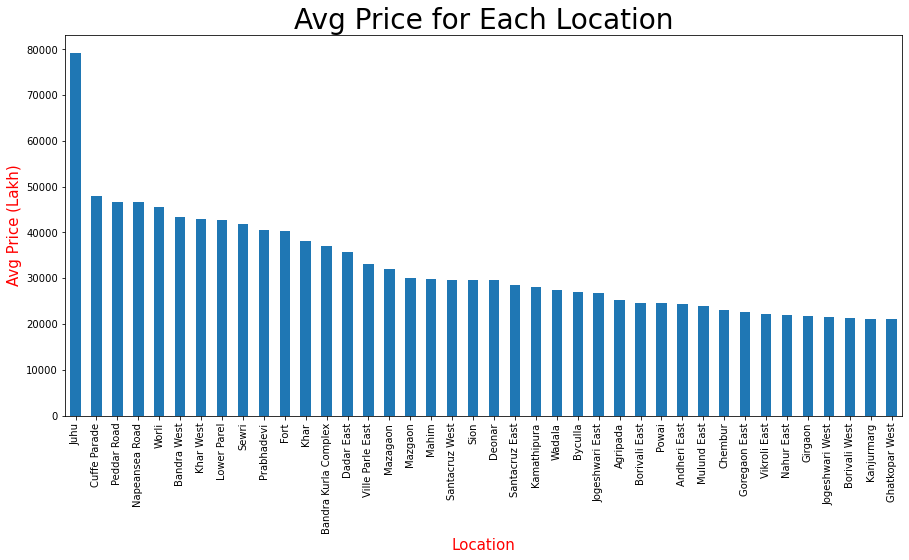

In [45]:
plt.figure(figsize=(15,7))
df.groupby("Location")['price_sqft'].mean().sort_values(ascending=False)[:40].plot(kind="bar")
plt.xlabel("Location",size=15,c="r")
plt.ylabel("Avg Price (Lakh)",size=15,c="r")
plt.title("Avg Price for Each Location",size=28,c="k")
plt.show()

#### Conclusion
* Avg price is very high in juhu area i.e above 7 core
* Worli, Bandra, Peddar Road, Khar, Lower Prael Dadar and Prabhavdevi has also higher rate above 3 core

### Correlation OF Each Feature - Heat Map

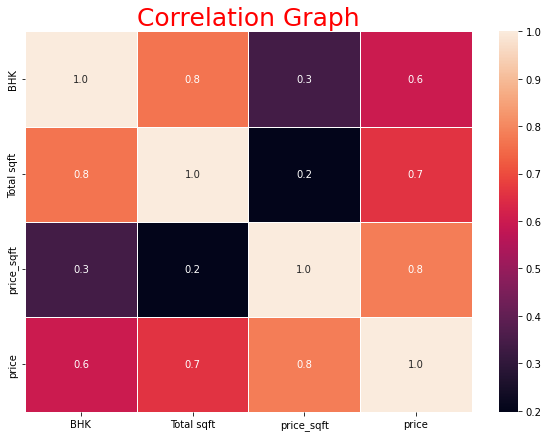

In [46]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True,linewidths=.5,fmt='.1f')
plt.title("Correlation Graph",c="r",size=25)
plt.show()

#### As seen from aboveToatl sft, Price_sft has strong realtion with price

In [47]:
df_groups = df.groupby(['Location'])['price_sqft'].mean()

In [48]:
df_groups

Location
Agripada          25260.800000
Airoli            14105.840909
Ambarnath          3385.000000
Ambernath East     4176.565217
Ambernath West     4166.000000
                      ...     
Virar West         5600.000000
Wada               5818.000000
Wadala            27405.000000
Warai              2142.000000
Worli             45555.000000
Name: price_sqft, Length: 121, dtype: float64

### Avg Price for Different Location BHK wise by Group By clause

In [49]:
df.groupby("Location")['price'].mean().sort_values(ascending=False)[:10]

Location
Juhu              1900.000000
Napeansea Road     783.333333
Prabhadevi         766.666667
Worli              749.500000
Khar West          600.000000
Khar               580.000000
Cuffe Parade       575.000000
Lower Parel        567.833333
Bandra West        495.312500
Agripada           488.600000
Name: price, dtype: float64

### Avg Price for Different Location for diff BHK by Group By clause

In [50]:
df_groups = df.groupby(['Location', 'BHK'])['price'].mean()

In [51]:
df_groups

Location  BHK
Agripada  1       170.000000
          2       295.000000
          3       631.250000
          4      1011.000000
Airoli    1        81.595238
                    ...     
Wadala    1       112.000000
          2       237.500000
          3       400.000000
Warai     1        14.990000
Worli     3       749.500000
Name: price, Length: 282, dtype: float64

In [52]:
lc1=[]
bhk2=[]
price=list(df_groups.values)

for i in df_groups.index:
    lc1.append([i][0][0])
    bhk2.append([i][0][1])

In [53]:
df2=pd.DataFrame()
df_groups.index[0]
df2['location']=lc1
df2['bhk']=bhk2
df2['price']=price

In [54]:
df2

,location,bhk,price
0,Agripada,1,170.000000
1,Agripada,2,295.000000
2,Agripada,3,631.250000
3,Agripada,4,1011.000000
4,Airoli,1,81.595238
...,...,...,...
277,Wadala,1,112.000000
278,Wadala,2,237.500000
279,Wadala,3,400.000000
280,Warai,1,14.990000


In [55]:
df2[df2['bhk']>3].index
df2.drop(df2[df2['bhk']>3].index,axis=0,inplace=True)
df2.reset_index(inplace=True)

In [56]:
df2.drop('index',axis=1,inplace=True)
df2

,location,bhk,price
0,Agripada,1,170.000000
1,Agripada,2,295.000000
2,Agripada,3,631.250000
3,Airoli,1,81.595238
4,Airoli,2,137.210526
...,...,...,...
253,Wadala,1,112.000000
254,Wadala,2,237.500000
255,Wadala,3,400.000000
256,Warai,1,14.990000


In [57]:
l4=list(df.groupby("Location")['price'].mean().sort_values(ascending=False)[:55].index)

In [58]:
df3=df2[df2['location'].isin(l4)]

In [59]:
df3.reset_index(inplace=True)
df3.drop('index',axis=1,inplace=True)

In [60]:
df3

,location,bhk,price
0,Agripada,1,170.00
1,Agripada,2,295.00
2,Agripada,3,631.25
3,Andheri East,1,126.00
4,Andheri East,2,182.25
...,...,...,...
113,Ville Parle East,2,250.00
114,Wadala,1,112.00
115,Wadala,2,237.50
116,Wadala,3,400.00


In [61]:
l5=list(df3['location'].value_counts()[df3['location'].value_counts()>2].index)

In [62]:
df4=df3[df3['location'].isin(l5)]
df4.reset_index(inplace=True)
df4.drop('index',axis=1,inplace=True)

In [63]:
df4

,location,bhk,price
0,Agripada,1,170.000000
1,Agripada,2,295.000000
2,Agripada,3,631.250000
3,Andheri West,1,69.163333
4,Andheri West,2,171.555556
...,...,...,...
70,Thane West,2,122.000000
71,Thane West,3,218.375000
72,Wadala,1,112.000000
73,Wadala,2,237.500000


### Price Rate at Different Location BHK wise

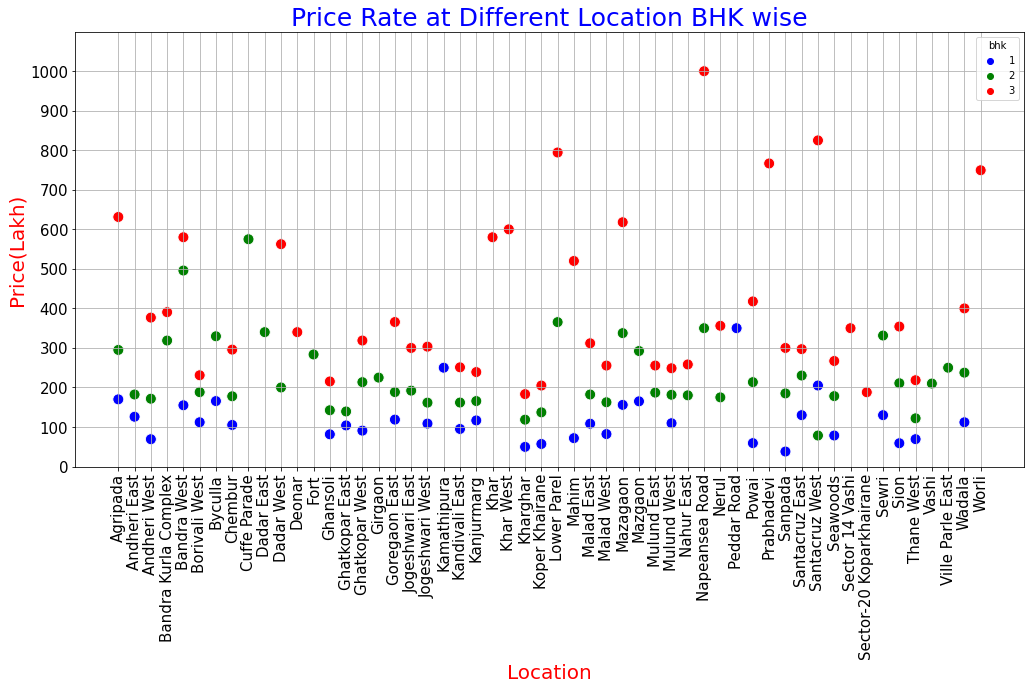

In [64]:
plt.figure(figsize=(17,8)) 
a=sns.scatterplot(data=df3,x="location",y='price',hue='bhk',palette=['blue','green','red'],s=120)
plt.xticks(rotation='vertical',size=15)
plt.yticks(size=15)
a.set_yticks(range(0,1100,100))
plt.xlabel("Location",size=20,c="r")
plt.ylabel("Price(Lakh)",size=20,c="r")
plt.title("Price Rate at Different Location BHK wise",size=25,c="b")
plt.ylim(0, 1100)
plt.grid()
plt.show()

### Conclusion
* As clearly seen afrom above for avg price rate price at differents location 
* Price rate is very high in Napeansea Road(Malbar Hills) i.e around 10 core for 3BHK house 
* Other Location includes such lower parel, santacruz Eest, Worli, Prabhadevi has price rate around 8 core for 3 BHK 
* Agripada, Khar, Mazgoan has rate around 6 core for 3 BHK sale
* Wadala, Powai, Bandra complex,Goregoan,Mahim Nerul has rate above 3 core 

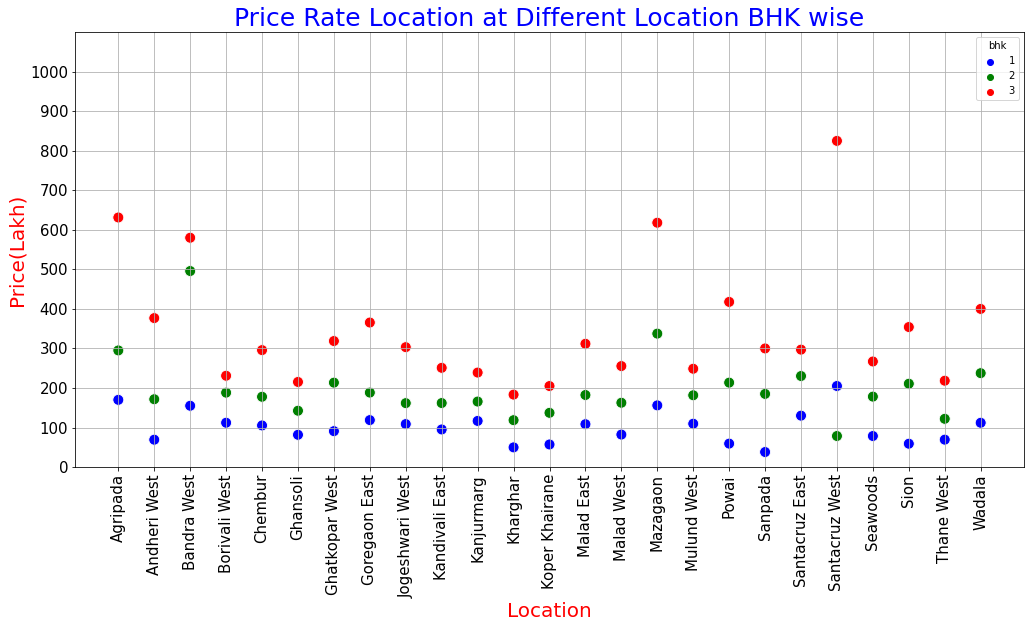

In [65]:
plt.figure(figsize=(17,8)) 
a=sns.scatterplot(data=df4,x="location",y='price',hue='bhk',palette=['blue','green','red'],s=120)
plt.xticks(rotation='vertical',size=15)
plt.yticks(size=15)
a.set_yticks(range(0,1100,100))
plt.xlabel("Location",size=20,c="r")
plt.ylabel("Price(Lakh)",size=20,c="r")
plt.title("Price Rate Location at Different Location BHK wise",size=25,c="b")
plt.ylim(0, 1100)
plt.grid()
plt.show()

### Price Distribution -- Distplot 

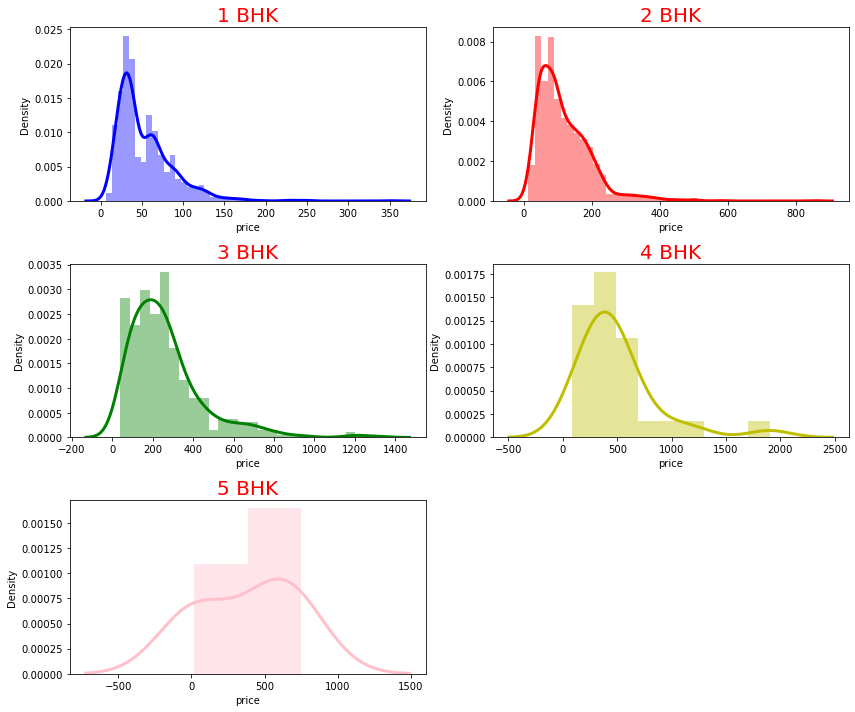

In [66]:
df_1=df[df['BHK']==1]
df_2=df[df['BHK']==2]
df_3=df[df['BHK']==3]
df_4=df[df['BHK']==4]
df_5=df[df['BHK']==5]
plt.figure(figsize=(12,10))
plt.subplot(3,2,1)
sns.distplot(df_1['price'],color='b',kde_kws={'linewidth':3,'color':'b'})
plt.title("1 BHK",size=20,c="r")
plt.subplot(3,2,2)
sns.distplot(df_2['price'],color='r',kde_kws={'linewidth':3,'color':'r'})
plt.title("2 BHK",size=20,c="r")
plt.subplot(3,2,3)
sns.distplot(df_3['price'],color='g',kde_kws={'linewidth':3,'color':'g'})
plt.title("3 BHK",size=20,c="r")
plt.subplot(3,2,4)
sns.distplot(df_4['price'],color='y',kde_kws={'linewidth':3,'color':'y'})
plt.title("4 BHK",size=20,c="r")
plt.subplot(3,2,5)
sns.distplot(df_5['price'],color='pink',kde_kws={'linewidth':3,'color':'pink'})
plt.title("5 BHK",size=20,c="r")
plt.tight_layout()
plt.show()

### Price Distribution -- BoxPlot

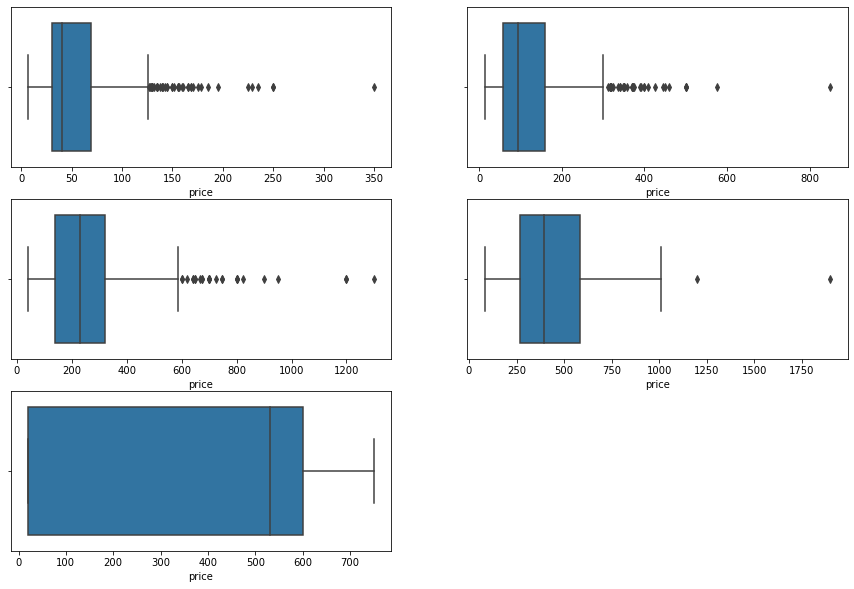

In [67]:
df_1=df[df['BHK']==1]
df_2=df[df['BHK']==2]
df_3=df[df['BHK']==3]
df_4=df[df['BHK']==4]
df_5=df[df['BHK']==5]
plt.figure(figsize=(15,10))
plt.subplot(3,2,1)
sns.boxplot(data=df_1,x=df_1['price'])
plt.subplot(3,2,2)
sns.boxplot(data=df_2,x=df_2['price'])
plt.subplot(3,2,3)
sns.boxplot(data=df_3,x=df_3['price'])
plt.subplot(3,2,4)
sns.boxplot(data=df_4,x=df_4['price'])
plt.subplot(3,2,5)
sns.boxplot(data=df_5,x=df_5['price'])
plt.show()

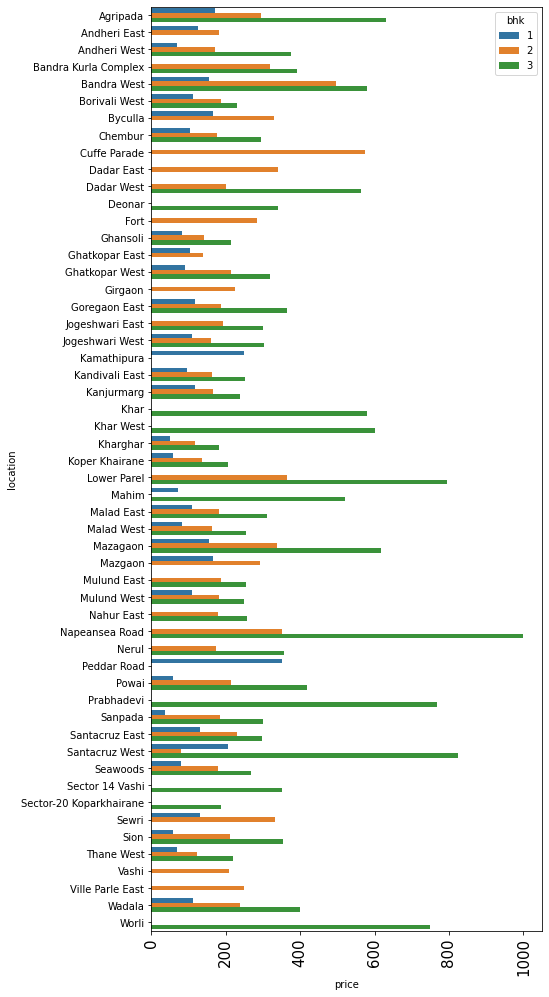

In [68]:
plt.figure(figsize=(7,17))
sns.barplot(y='location',x='price',hue='bhk',data=df3)
plt.xticks(size=15,rotation=90)
plt.show()